#**Analyze the COVID-19 DNA sequence data**

Here, we will try to get as many insights regarding the proteins that made it up. Later will compare COVID-19 DNA with MERS and SARS and we’ll understand the relationship among them.

In [3]:
# Firstly mount drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To start with, install Python packages like Biopython and squiggle will help you when dealing with biological sequence data in Python.

In [4]:
! pip install biopython
! pip install Squiggle

     |████████████████████████████████| 2.3MB 31.0MB/s 
  Created wheel for pyfaidx: filename=pyfaidx-0.5.9.5-cp37-none-any.whl size=25142 sha256=a4f3854f6bbac112ddf97c6de041b5f6768ffb5e97a8501543f5e9ecae13f3ce
  Stored in directory: /root/.cache/pip/wheels/d8/31/5f/8053c426a420cc407492252723f20e9a9c7e717909d7e08a9e
Successfully built pyfaidx


Load the basic libraries

In [5]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

The dataset can be downloaded from [Kaggle](https://www.kaggle.com/paultimothymooney/coronavirus-genome-sequence)

We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta). It provides a simple uniform interface to input and output assorted sequence file formats.

In [7]:
from Bio import SeqIO
for sequence in SeqIO.parse('/content/drive/My Drive/archive/MN908947.fna', "fasta"):
  print(sequence.seq)
  print(len(sequence),'nucliotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

So it produces the sequence and length of the sequence.

Now, Loading Complementary DNA Sequence into an alignable file.

SeqIO.read() will produce will that basic information regarding the sequence.

In [8]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('/content/drive/My Drive/archive/MN908947.fna', "fasta")

In [9]:
print(DNAsequence)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


Since input sequence is FASTA (DNA), and Coronavirus is RNA type of virus, we need to:

1.   Transcribe DNA to RNA (ATTAAAGGTT… => AUUAAAGGUU…)
2.   Translate RNA to Amino acid sequence (AUUAAAGGUU… => IKGLYLPR*Q…) 

In the current scenario, the .fna file starts with ATTAAAGGTT, then we call transcribe() so T (thymine) is replaced with U (uracil), so we get the RNA sequence which starts with AUUAAAGGUU.

The transcribe() will convert the DNA to mRNA.

In [10]:
DNA = DNAsequence.seq #Convert DNA into mRNA Sequence
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
print(mRNA)
print('Size : ',len(mRNA))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

Next, we need to translate the mRNA sequence to amino-acid sequence using translate() method, we get something like IKGLYLPR*Q ( is so-called STOP codon, effectively is a separator for proteins).

In the below output Amino acids are separated by *.

In [11]:
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Let's find out the codon table as depicted below.

In [12]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

Let’s now identify all the Proteins (chains of amino acids), basically separating at the stop codon, marked by *. Then let’s remove any sequence less than 20 amino acids long, as this is the smallest known functional protein.

In [16]:
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total proteins: 775
Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


Protein Analysis With The Protparam Module In Biopython.

In [26]:
from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in Proteins[:]: 
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI)
    if(sum(list(POI.values()))>0):
      print("Amino acids percent = ", str(X.get_amino_acids_percent())) 
    print("Molecular weight = ", MW)
    if(sum(list(POI.values()))>0):
      print("Aromaticity = ", X.aromaticity()) 
    print("Flexibility = ", X.flexibility())
    if(sum(list(POI.values()))>0): 
      print("Isoelectric point = ", X.isoelectric_point()) 
      print("Secondary structure fraction = ", X.secondary_structure_fraction())

Streaming output truncated to the last 5000 lines.
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.5, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.5, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}
Molecular weight =  303.31499999999994
Aromaticity =  0.0
Flexibility =  []
Isoelectric point =  6.101802253723143
Secondary structure fraction =  (0.0, 0.0, 0.5)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
Molecular weight =  18.0153
Flexibility =  []


Protein of Interest =  {'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 1, 'I': 1, 'K': 1, 'L': 1, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.2, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.2, 'I': 0.2, 'K': 0.2, 'L': 0.2, 'M': 0.0, 'N': 0.0, 

Plot the results

<BarContainer object of 20 artists>

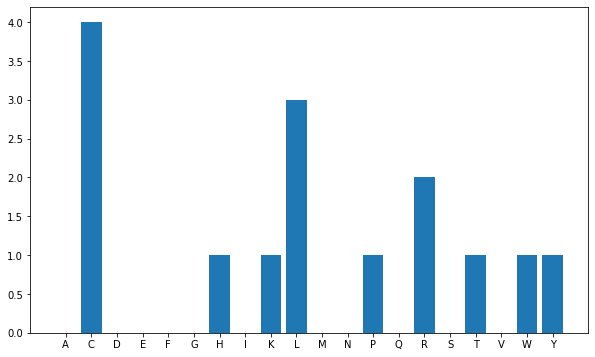

In [27]:
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] ) #plot POI
poi_list = poi_list[48]
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

Text(0.5, 1.0, 'Length of proteins (where > 1000)')

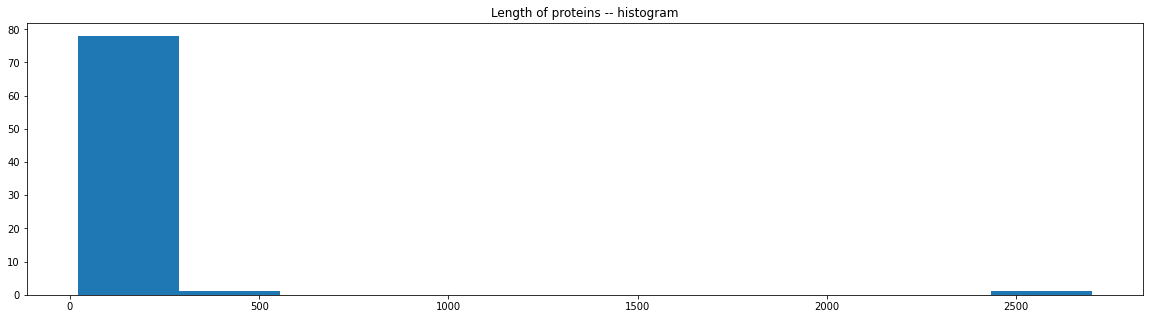

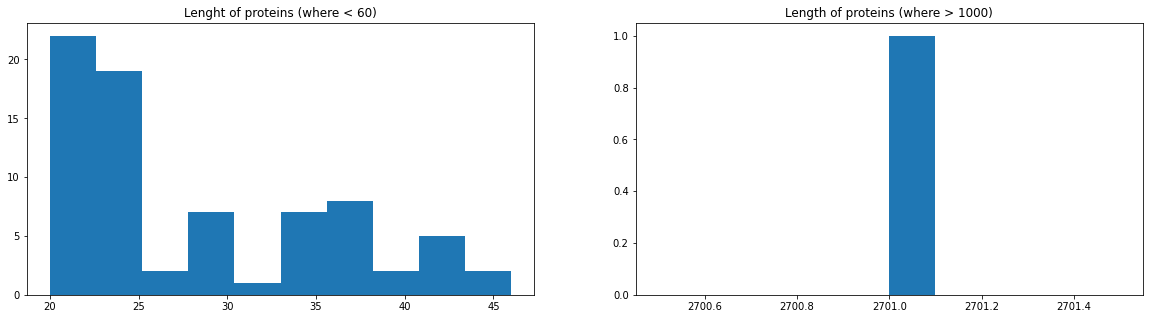

In [33]:
# Plot lengths
plt.figure(figsize=(20,5))
plt.subplot(111)
plt.hist(functional_proteins['length'])
plt.title('Length of proteins -- histogram')
# Remove the extremes
plt.figure(figsize=(20,5))
wo = functional_proteins.loc[functional_proteins['length'] < 60]
plt.subplot(121)
plt.hist(wo['length'])
plt.title('Lenght of proteins (where < 60)')

wo = functional_proteins.loc[functional_proteins['length'] > 1000]
plt.subplot(122)
plt.hist(wo['length'])
plt.title('Length of proteins (where > 1000)')

In [34]:
# See what's about that huge protein
large_prot = functional_proteins.loc[functional_proteins['length'] > 2700]
l = large_prot['sequence'].tolist()[0]
print('Sequence sample:', '...',l[1000:1150],'...')

Sequence sample: ... CKSHKPPISFPLCANGQVFGLYKNTCVGSDNVTDFNAIATCDWTNAGDYILANTCTERLKLFAAETLKATEETFKLSYGIATVREVLSDRELHLSWEVGKPRPPLNRNYVFTGYRVTKNSKVQIGEYTFEKGDYGDAVVYRGTTTYKLNV ...


Now let us compare the similarity among COVID-19/COV2, MERS, and SARS.

Load the DNA sequence file (FASTA) each of SARS, MERS, and COVID-19.

In [28]:
#Comparing Human Coronavirus RNA
from Bio import pairwise2
SARS = SeqIO.read("/content/drive/My Drive/archive/sars.fasta", "fasta")
MERS = SeqIO.read("/content/drive/My Drive/archive/mers.fasta", "fasta")
COV2 = SeqIO.read("/content/drive/My Drive/archive/cov2.fasta", "fasta")

In [29]:
print(SARS)
print(MERS)
print(COV2)

ID: NC_004718.3
Name: NC_004718.3
Description: NC_004718.3 SARS coronavirus, complete genome
Number of features: 0
Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA')
ID: NC_019843.3
Name: NC_019843.3
Description: NC_019843.3 Middle East respiratory syndrome coronavirus, complete genome
Number of features: 0
Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA')
ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


Before comparing the similarity let us visualize the DNA each of COV2, SARS, and MERS respectively.

In [36]:
#Execute on terminal
!Squiggle cov2.fasta sars.fasta mers.fasta --method=gates --separate

/bin/bash: Squiggle: command not found


In [39]:
from itertools import islice, count

from tqdm import tqdm


def _k_mers(sequence, k):
    it = iter(sequence)
    result = tuple(islice(it, k))
    if len(result) == k:
        yield "".join(result)
    for elem in it:
        result = result[1:] + (elem,)
        yield "".join(result)


def transform(sequence, method="squiggle", bar=False):
    """Transforms a DNA sequence into a series of coordinates for 2D visualization.
    Args:
        sequence (str): The DNA sequence to transform.
        method (str): The method by which to transform the sequence. Defaults to "squiggle". Valid options are ``squiggle``, ``gates``, ``yau``, ``randic`` and ``qi``.
        bar (bool): Whether to display a progress bar. Defaults to false.
    Returns:
        tuple: A tuple containing two lists: one for the x coordinates and one for the y coordinates.
    Example:
        >>> transform("ATGC")
        ([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], [0, 0.5, 0, -0.5, -1, -0.5, 0, -0.5, 0])
        >>> transform("ATGC", method="gates")
        ([0, 0, 0, 1, 0], [0, -1, 0, 0, 0])
        >>> transform("ATGC", method="yau")
        ([0, 0.5, 1.0, 1.8660254037844386, 2.732050807568877], [0, -0.8660254037844386, 0.0, -0.5, 0.0])
        >>> transform("ATGC", method="yau-bp")
        ([0, 1, 2, 3, 4], [0, -1, 0, -0.5, 0.0])
        >>> transform("ATGC", method="randic")
        ([0, 1, 2, 3], [3, 2, 1, 0])
        >>> transform("ATGC", method="qi")
        ([0, 1, 2], [8, 7, 11])
    Warning:
        The entire sequence must be able to fit in memory.
    Raises:
        ValueError: When an invalid character is in the sequence.
    """

    sequence = sequence.upper()

    if bar:
        sequence = tqdm(sequence, unit=" bases", leave=False)

    if method == "squiggle":
        running_value = 0
        _x = count(0, step=0.5)
        x, y = [next(_x) for _ in range(2 * len(sequence) + 1)], [0]
        for character in sequence:
            if character == "A":
                y.extend([running_value + 0.5, running_value])
            elif character == "C":
                y.extend([running_value - 0.5, running_value])
            elif character == "T":
                y.extend([running_value - 0.5, running_value - 1])
                running_value -= 1
            elif character == "G":
                y.extend([running_value + 0.5, running_value + 1])
                running_value += 1
            else:
                y.extend([running_value] * 2)
        return x, y

    elif method == "gates":
        x, y = [0], [0]
        for character in sequence:
            if character == "A":
                x.append(x[-1])  # no change in x coord
                y.append(y[-1] - 1)
            elif character == "T":
                x.append(x[-1])  # no change in x coord
                y.append(y[-1] + 1)
            elif character == "G":
                x.append(x[-1] + 1)
                y.append(y[-1])  # no change in y coord
            elif character == "C":
                x.append(x[-1] - 1)
                y.append(y[-1])  # no change in y coord
            else:
                raise ValueError(
                    "Invalid character in sequence: "
                    + character
                    + ". Gates's method does not support non-ATGC bases. Try using method=squiggle."
                )

    elif method == "yau":
        x, y = [0], [0]
        for character in sequence:
            if character == "A":
                x.append(x[-1] + 0.5)
                y.append(y[-1] - ((3 ** 0.5) / 2))
            elif character == "T":
                x.append(x[-1] + 0.5)
                y.append(y[-1] + ((3 ** 0.5) / 2))
            elif character == "G":
                x.append(x[-1] + ((3 ** 0.5) / 2))
                y.append(y[-1] - 0.5)
            elif character == "C":
                x.append(x[-1] + ((3 ** 0.5) / 2))
                y.append(y[-1] + 0.5)
            else:
                raise ValueError(
                    "Invalid character in sequence: "
                    + character
                    + ". Yau's method does not support non-ATGC bases. Try using method=squiggle."
                )

    elif method == "yau-bp":
        _x = count(0)
        x, y = [next(_x) for _ in range(len(sequence) + 1)], [0]
        for character in sequence:
            if character == "A":
                y.append(y[-1] - 1)
            elif character == "T":
                y.append(y[-1] + 1)
            elif character == "G":
                y.append(y[-1] - 0.5)
            elif character == "C":
                y.append(y[-1] + 0.5)
            else:
                raise ValueError(
                    "Invalid character in sequence: "
                    + character
                    + ". Yau's method does not support non-ATGC bases. Try using method=squiggle."
                )

    elif method == "randic":
        x, y = [], []
        mapping = dict(A=3, T=2, G=1, C=0)
        for i, character in enumerate(sequence):
            x.append(i)
            try:
                y.append(mapping[character])
            except KeyError:
                raise ValueError(
                    "Invalid character in sequence: "
                    + character
                    + ". Randić's method does not support non-ATGC bases. Try using method=squiggle."
                )

    elif method == "qi":
        mapping = {
            "AA": 12,
            "AC": 4,
            "GT": 6,
            "AG": 0,
            "CC": 13,
            "CA": 5,
            "CG": 10,
            "TT": 15,
            "GG": 14,
            "GC": 11,
            "AT": 8,
            "GA": 1,
            "TG": 7,
            "TA": 9,
            "TC": 3,
            "CT": 2,
        }
        x, y = [], []

        for i, k_mer in enumerate(_k_mers(sequence, 2)):
            x.append(i)
            try:
                y.append(mapping[k_mer])
            except KeyError:
                raise ValueError(
                    "Invalid k-mer in sequence: "
                    + k_mer
                    + ". Qi's method does not support non-ATGC bases. Try using method=squiggle."
                )

    else:
        raise ValueError(
            "Invalid method. Valid methods are 'squiggle', 'gates', 'yau', and 'randic'."
        )

    if bar:
        sequence.close()

    return x, y

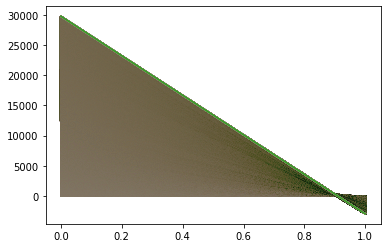

In [48]:
plt.plot(transform(SARS))
plt.show()

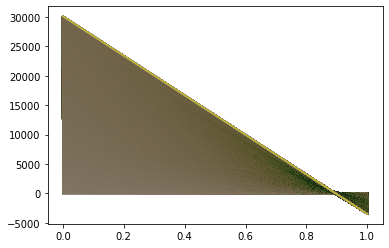

In [50]:
plt.plot(transform(MERS))
plt.show()

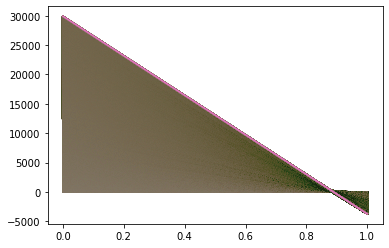

In [51]:
plt.plot(transform(COV2))
plt.show()

Now let us use the Sequence alignment technique to compare the similarity among all the DNA sequences.



In [52]:
# Alignments using pairwise2 alghoritm
SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('SARS/COV Similarity (%):', SARS_COV / len(SARS.seq) * 100)
MERS_COV = pairwise2.align.globalxx(MERS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('MERS/COV Similarity (%):', MERS_COV / len(MERS.seq) * 100)
MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only=True, score_only=True)
print('MERS/SARS Similarity (%):', MERS_SARS / len(SARS.seq) * 100)

SARS/COV Similarity (%): 83.33837518066619
MERS/COV Similarity (%): 69.39141405757164
MERS/SARS Similarity (%): 69.93714496991697


Phylogenetic analysis of the complete viral genome (29,903 nucleotides) revealed that the COVID-19 virus was most closely related (83.3% nucleotide similarity) to a group of SARS-like coronaviruses (genus Betacoronavirus, subgenus Sarbecovirus) that had previously been found in bats in China.

Plot the results

<BarContainer object of 3 artists>

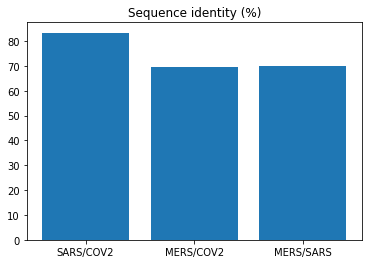

In [53]:
# Plot the data
X = ['SARS/COV2', 'MERS/COV2', 'MERS/SARS']
Y = [SARS_COV/ len(SARS.seq) * 100, MERS_COV/ len(MERS.seq)*100, MERS_SARS/len(SARS.seq)*100]
plt.title('Sequence identity (%)')
plt.bar(X,Y)